# Name: Kirti Singh

# LinkedIn: linkedin.com/in/kirti-singh-baghel-05384b153

Task #2: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
Use R or Python or perform this task.

Cluster:
A cluster refers to a collection of data points aggregated together because of certain similarities.

K-Means Clustering:
K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.

# @@ Basic step used to cluster any  data point @@
 ### . Define the number of K clusters
 ### . Initialize the centroids
 ### . perfrom this iteration  until there is no change to the centroids.
 ### . Sum of the squared distance between data point and all centroids.
 ### . assign each data point.
 ### . estimate the centroid for the clusters.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [8]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)

# statistics of scaled data
pd.DataFrame(scaled_df).describe()

,0,1,2,3
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-1.690315e-15,-1.842970e-15,-1.698641e-15,-1.409243e-15
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [9]:
from sklearn.cluster import KMeans

In [10]:
x=df.iloc[:, [0, 1, 2, 3]].values

C:\anco\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\anco\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\anco\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\anco\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\anco\lib\site-packages\sklearn\cluste

Text(0, 0.5, 'Inertia')

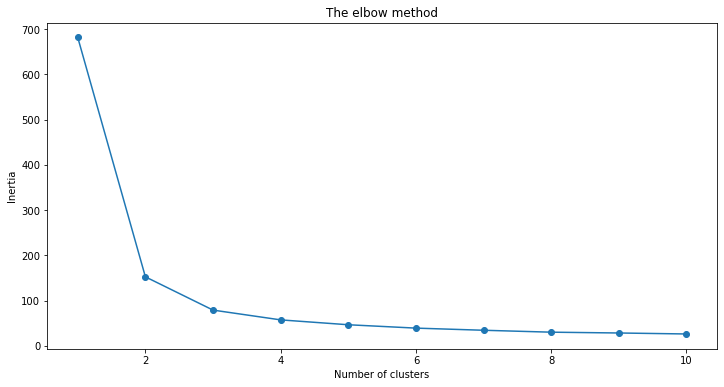

In [21]:
# fitting multiple k-means algorithms and storing the values in an empty list
sse=[]
for  cluster in range(1,11):
    Kmeans=KMeans(n_jobs = -1,n_clusters= cluster,init='k-means++',max_iter = 300, n_init = 10, random_state = 0)
    Kmeans.fit(x)
    sse.append(Kmeans.inertia_)
# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'cluster':range(1,11), 'sse':sse})
plt.figure(figsize=(12,6))
plt.plot(frame['cluster'],frame['sse'],marker='o')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [22]:
sse

[681.3705999999996,
 152.34795176035797,
 78.851441426146,
 57.22847321428572,
 46.47223015873018,
 39.03998724608725,
 34.299712121212146,
 30.063110617452732,
 28.27172172856384,
 26.094324740540422]

In [23]:
## clustering using K-Means cluster

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(df)


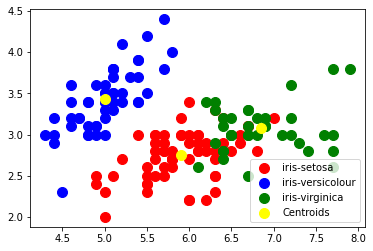

In [27]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1],s=100,c="red",label="iris-setosa")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1],s=100,c="blue",label="iris-versicolour")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1],s=100,c="green",label="iris-virginica")
# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()